In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("../data/raw/aqi_data.csv")
df.head()

,Unnamed: 0,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,0,1701388800,2830.51,0.71,91.85,7.33,98.23,302.49,352.06,25.84,5
1,1,1701392400,3204.35,5.25,101.45,0.89,103.95,348.80,395.55,27.61,5
2,2,1701396000,3845.21,21.46,108.30,0.07,116.35,411.29,462.70,34.96,5
3,3,1701399600,4272.46,42.47,113.79,1.99,131.61,449.61,504.76,33.44,5
4,4,1701403200,3471.37,38.89,119.27,12.34,164.03,419.67,462.73,13.05,5


In [3]:
ndf = df.drop("Unnamed: 0", axis=1)
ndf.head()

,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
0,1701388800,2830.51,0.71,91.85,7.33,98.23,302.49,352.06,25.84,5
1,1701392400,3204.35,5.25,101.45,0.89,103.95,348.80,395.55,27.61,5
2,1701396000,3845.21,21.46,108.30,0.07,116.35,411.29,462.70,34.96,5
3,1701399600,4272.46,42.47,113.79,1.99,131.61,449.61,504.76,33.44,5
4,1701403200,3471.37,38.89,119.27,12.34,164.03,419.67,462.73,13.05,5


In [4]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8665 entries, 0 to 8664
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  8665 non-null   int64  
 1   CO        8665 non-null   float64
 2   NO        8665 non-null   float64
 3   NO2       8665 non-null   float64
 4   O3        8665 non-null   float64
 5   SO2       8665 non-null   float64
 6   PM2_5     8665 non-null   float64
 7   PM10      8665 non-null   float64
 8   NH3       8665 non-null   float64
 9   AQI       8665 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 677.1 KB


In [5]:
ndf['Datetime'] = pd.to_datetime(ndf['Datetime'], unit='s')

In [6]:
ndf['Time'] = ndf['Datetime'].dt.time
ndf['Datetime'] = ndf['Datetime'].dt.date

In [7]:
ndf.head()

,Datetime,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI,Time
0,2023-12-01,2830.51,0.71,91.85,7.33,98.23,302.49,352.06,25.84,5,00:00:00
1,2023-12-01,3204.35,5.25,101.45,0.89,103.95,348.80,395.55,27.61,5,01:00:00
2,2023-12-01,3845.21,21.46,108.30,0.07,116.35,411.29,462.70,34.96,5,02:00:00
3,2023-12-01,4272.46,42.47,113.79,1.99,131.61,449.61,504.76,33.44,5,03:00:00
4,2023-12-01,3471.37,38.89,119.27,12.34,164.03,419.67,462.73,13.05,5,04:00:00


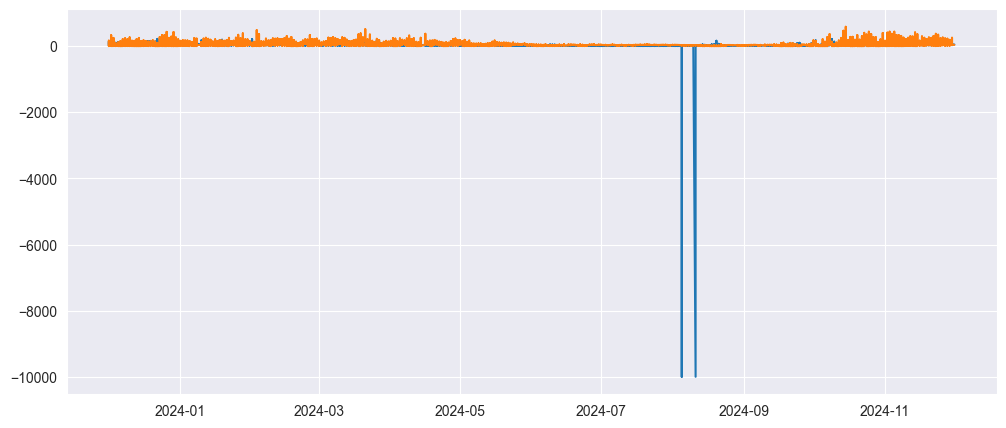

In [8]:
plt.figure(figsize=(12,5))
plt.plot(ndf['Datetime'], ndf['NO2'])
plt.plot(ndf['Datetime'], ndf['O3'])
plt.show()

In [9]:
mdf = ndf.groupby('Datetime')[['CO','NO','NO2','O3','SO2','PM2_5','PM10','NH3','AQI']].mean()
mdf.head()

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
Datetime,,,,,,,,,
2023-12-01,2444.982500,8.505417,80.148750,59.910417,89.983333,258.087500,298.238333,17.395833,5.000000
2023-12-02,2334.276667,3.590417,76.727917,102.158333,77.267500,255.080833,291.353333,18.156667,5.000000
2023-12-03,1745.423750,5.620000,53.922083,77.405000,52.918750,169.265417,200.374583,16.766667,5.000000
2023-12-04,1599.391667,12.696667,48.253333,38.534583,60.726667,135.482500,164.754167,18.091250,4.958333
2023-12-05,1471.997083,7.307917,52.295000,46.539583,60.647500,117.335833,144.944583,18.677083,4.791667


In [10]:
mdf.corr()

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,AQI
CO,1.000000,0.602789,0.693576,0.541028,0.939810,0.950523,0.937892,0.925268,0.836570
NO,0.602789,1.000000,0.395652,-0.054850,0.635325,0.414075,0.423218,0.634360,0.433322
NO2,0.693576,0.395652,1.000000,0.405320,0.686823,0.650305,0.647202,0.663891,0.644766
O3,0.541028,-0.054850,0.405320,1.000000,0.550477,0.652411,0.653656,0.495994,0.690713
SO2,0.939810,0.635325,0.686823,0.550477,1.000000,0.875407,0.866094,0.901734,0.873042
PM2_5,0.950523,0.414075,0.650305,0.652411,0.875407,1.000000,0.974734,0.817395,0.807073
PM10,0.937892,0.423218,0.647202,0.653656,0.866094,0.974734,1.000000,0.830006,0.825415
NH3,0.925268,0.634360,0.663891,0.495994,0.901734,0.817395,0.830006,1.000000,0.857573
AQI,0.836570,0.433322,0.644766,0.690713,0.873042,0.807073,0.825415,0.857573,1.000000


C:\Users\thanh\AppData\Local\Temp\ipykernel_31268\3690419539.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


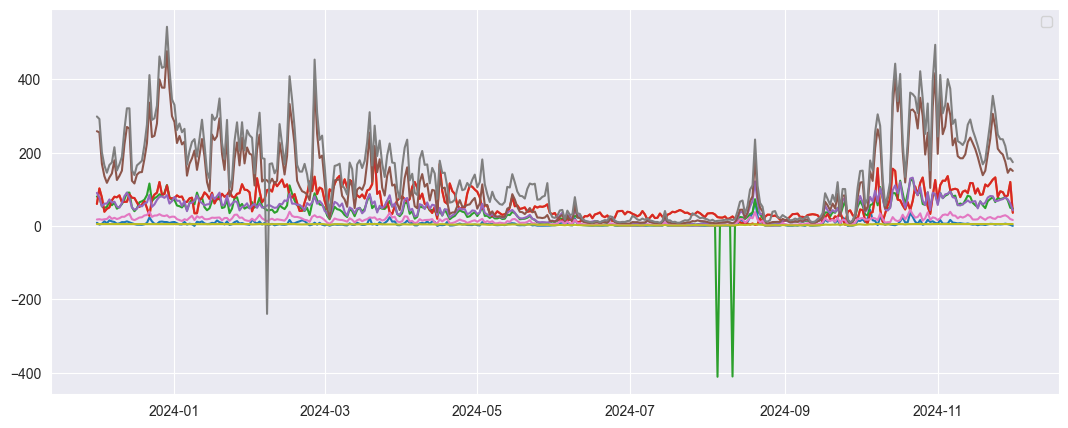

In [11]:
plt.figure(figsize=(13,5))
plt.plot(mdf.index, mdf['NO'])
plt.plot(mdf.index, mdf['O3'])
plt.plot(mdf.index, mdf['NO2'])
plt.plot(mdf.index, mdf['O3'])
plt.plot(mdf.index, mdf['SO2'])
plt.plot(mdf.index, mdf['PM2_5'])
plt.plot(mdf.index, mdf['NH3'])
plt.plot(mdf.index, mdf['PM10'])
plt.plot(mdf.index, mdf['AQI'])
plt.legend()
plt.show()

In [12]:
mean_list = mdf.mean().to_list()
sd_list = mdf.std().to_list()
col_list = mdf.columns.to_list()

# define scaling function
def scaling_func(row):
    row.CO = (row.CO - mean_list[0])/sd_list[0]
    row.NO = (row.NO - mean_list[1])/sd_list[1]
    row.NO2 = (row.NO2 - mean_list[2])/sd_list[2]
    row.O3 = (row.O3 - mean_list[3])/sd_list[3]
    row.SO2 = (row.SO2 - mean_list[4])/sd_list[4]
    row.PM2_5 = (row.PM2_5 - mean_list[5])/sd_list[5]
    row.PM10 = (row.PM10 - mean_list[6])/sd_list[6]
    row.NH3 = (row.NH3 - mean_list[7])/sd_list[7]
    row.AQI = (row.AQI - mean_list[8])/sd_list[8]
    return row

In [13]:
sdf = mdf.apply(scaling_func, axis='columns')

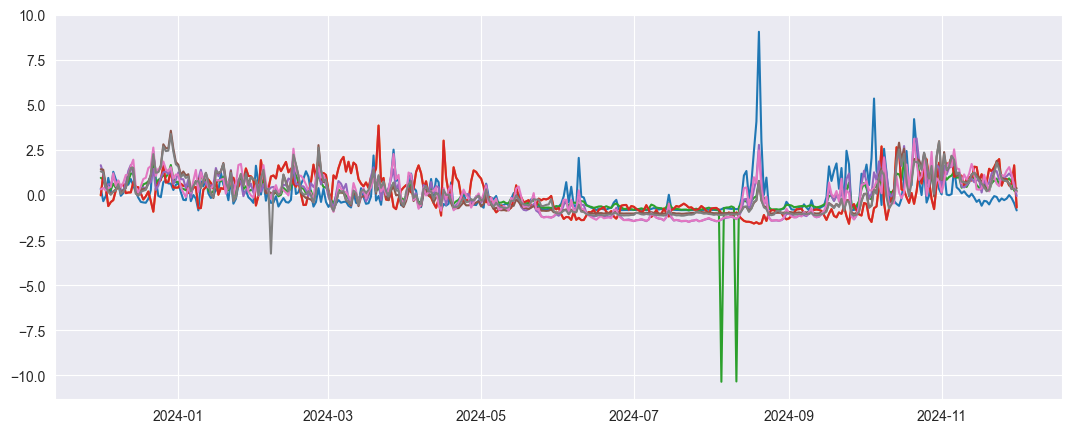

In [14]:
plt.figure(figsize=(13,5))
plt.plot(sdf.index, sdf['NO'])
plt.plot(sdf.index, sdf['O3'])
plt.plot(sdf.index, sdf['NO2'])
plt.plot(sdf.index, sdf['O3'])
plt.plot(sdf.index, sdf['SO2'])
plt.plot(sdf.index, sdf['PM2_5'])
plt.plot(sdf.index, sdf['NH3'])
plt.plot(sdf.index, sdf['PM10'])
plt.show()